## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  15.139922   233.494441  0.845049  3.079419   198.056407
1  29.463848   448.317641  0.429944  6.882875   195.211534
2  59.598494  1302.330968  0.526666  4.181061   688.485074
3  15.666118  1047.262952  0.470314  7.194299   492.596605
4  34.108171  1599.964962  0.725816  9.159317  1161.849086


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0323420	total: 57.2ms	remaining: 57.1s
1:	learn: 1.0185261	total: 57.7ms	remaining: 28.8s
2:	learn: 1.0079210	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9921959	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9779064	total: 59ms	remaining: 11.7s
5:	learn: 0.9644982	total: 59.5ms	remaining: 9.85s
6:	learn: 0.9519818	total: 59.9ms	remaining: 8.49s
7:	learn: 0.9388344	total: 60.3ms	remaining: 7.47s
8:	learn: 0.9258580	total: 60.9ms	remaining: 6.7s
9:	learn: 0.9125168	total: 61.3ms	remaining: 6.07s
10:	learn: 0.9036075	total: 61.7ms	remaining: 5.54s
11:	learn: 0.8888741	total: 62.1ms	remaining: 5.11s
12:	learn: 0.8763992	total: 62.6ms	remaining: 4.75s
13:	learn: 0.8631015	total: 63ms	remaining: 4.44s
14:	learn: 0.8519686	total: 63.4ms	remaining: 4.16s
15:	learn: 0.8410409	total: 63.8ms	remaining: 3.92s
16:	learn: 0.8295162	total: 64.2ms	remaining: 3.71s
17:	learn: 0.8180904	total: 64.7ms	remaining: 3.53s
18:	learn: 0.8087429	total: 65.1ms	remaining: 3.3

103:	learn: 0.2997318	total: 102ms	remaining: 879ms
104:	learn: 0.2966911	total: 103ms	remaining: 875ms
105:	learn: 0.2934371	total: 103ms	remaining: 869ms
106:	learn: 0.2904349	total: 104ms	remaining: 864ms
107:	learn: 0.2871847	total: 104ms	remaining: 857ms
108:	learn: 0.2847531	total: 104ms	remaining: 851ms
109:	learn: 0.2820335	total: 105ms	remaining: 846ms
110:	learn: 0.2792023	total: 105ms	remaining: 841ms
111:	learn: 0.2769903	total: 105ms	remaining: 836ms
112:	learn: 0.2743106	total: 106ms	remaining: 831ms
113:	learn: 0.2712137	total: 106ms	remaining: 826ms
114:	learn: 0.2681518	total: 107ms	remaining: 822ms
115:	learn: 0.2655499	total: 107ms	remaining: 818ms
116:	learn: 0.2627165	total: 108ms	remaining: 814ms
117:	learn: 0.2594731	total: 108ms	remaining: 809ms
118:	learn: 0.2572089	total: 109ms	remaining: 806ms
119:	learn: 0.2549123	total: 109ms	remaining: 802ms
120:	learn: 0.2518045	total: 110ms	remaining: 798ms
121:	learn: 0.2499728	total: 110ms	remaining: 793ms
122:	learn: 

296:	learn: 0.0833166	total: 186ms	remaining: 441ms
297:	learn: 0.0830435	total: 187ms	remaining: 440ms
298:	learn: 0.0827258	total: 187ms	remaining: 439ms
299:	learn: 0.0824998	total: 187ms	remaining: 437ms
300:	learn: 0.0822503	total: 188ms	remaining: 436ms
301:	learn: 0.0817055	total: 188ms	remaining: 435ms
302:	learn: 0.0814456	total: 189ms	remaining: 434ms
303:	learn: 0.0811085	total: 189ms	remaining: 433ms
304:	learn: 0.0808625	total: 189ms	remaining: 432ms
305:	learn: 0.0806249	total: 190ms	remaining: 431ms
306:	learn: 0.0804069	total: 190ms	remaining: 430ms
307:	learn: 0.0801079	total: 191ms	remaining: 429ms
308:	learn: 0.0798587	total: 191ms	remaining: 428ms
309:	learn: 0.0796329	total: 192ms	remaining: 427ms
310:	learn: 0.0793824	total: 192ms	remaining: 426ms
311:	learn: 0.0790072	total: 193ms	remaining: 425ms
312:	learn: 0.0787866	total: 193ms	remaining: 424ms
313:	learn: 0.0784371	total: 194ms	remaining: 423ms
314:	learn: 0.0781967	total: 194ms	remaining: 422ms
315:	learn: 

519:	learn: 0.0351342	total: 284ms	remaining: 262ms
520:	learn: 0.0349255	total: 284ms	remaining: 261ms
521:	learn: 0.0348335	total: 285ms	remaining: 261ms
522:	learn: 0.0346719	total: 285ms	remaining: 260ms
523:	learn: 0.0346374	total: 286ms	remaining: 259ms
524:	learn: 0.0345479	total: 286ms	remaining: 259ms
525:	learn: 0.0343468	total: 286ms	remaining: 258ms
526:	learn: 0.0342957	total: 287ms	remaining: 257ms
527:	learn: 0.0341398	total: 287ms	remaining: 257ms
528:	learn: 0.0340516	total: 288ms	remaining: 256ms
529:	learn: 0.0338559	total: 288ms	remaining: 255ms
530:	learn: 0.0336769	total: 289ms	remaining: 255ms
531:	learn: 0.0335264	total: 289ms	remaining: 254ms
532:	learn: 0.0333364	total: 290ms	remaining: 254ms
533:	learn: 0.0331503	total: 290ms	remaining: 253ms
534:	learn: 0.0329454	total: 290ms	remaining: 252ms
535:	learn: 0.0327865	total: 291ms	remaining: 252ms
536:	learn: 0.0326182	total: 291ms	remaining: 251ms
537:	learn: 0.0324498	total: 292ms	remaining: 251ms
538:	learn: 

716:	learn: 0.0170627	total: 368ms	remaining: 145ms
717:	learn: 0.0169528	total: 368ms	remaining: 145ms
718:	learn: 0.0168758	total: 369ms	remaining: 144ms
719:	learn: 0.0167840	total: 369ms	remaining: 144ms
720:	learn: 0.0167155	total: 370ms	remaining: 143ms
721:	learn: 0.0166512	total: 370ms	remaining: 143ms
722:	learn: 0.0165880	total: 371ms	remaining: 142ms
723:	learn: 0.0165022	total: 371ms	remaining: 141ms
724:	learn: 0.0164182	total: 372ms	remaining: 141ms
725:	learn: 0.0163314	total: 372ms	remaining: 140ms
726:	learn: 0.0162507	total: 372ms	remaining: 140ms
727:	learn: 0.0161697	total: 373ms	remaining: 139ms
728:	learn: 0.0161092	total: 373ms	remaining: 139ms
729:	learn: 0.0160311	total: 373ms	remaining: 138ms
730:	learn: 0.0159527	total: 374ms	remaining: 138ms
731:	learn: 0.0158940	total: 374ms	remaining: 137ms
732:	learn: 0.0158142	total: 375ms	remaining: 137ms
733:	learn: 0.0157382	total: 375ms	remaining: 136ms
734:	learn: 0.0156729	total: 376ms	remaining: 135ms
735:	learn: 

945:	learn: 0.0087266	total: 465ms	remaining: 26.6ms
946:	learn: 0.0086975	total: 466ms	remaining: 26.1ms
947:	learn: 0.0086764	total: 466ms	remaining: 25.6ms
948:	learn: 0.0086559	total: 467ms	remaining: 25.1ms
949:	learn: 0.0086274	total: 467ms	remaining: 24.6ms
950:	learn: 0.0085993	total: 468ms	remaining: 24.1ms
951:	learn: 0.0085592	total: 468ms	remaining: 23.6ms
952:	learn: 0.0085312	total: 469ms	remaining: 23.1ms
953:	learn: 0.0085038	total: 469ms	remaining: 22.6ms
954:	learn: 0.0084662	total: 469ms	remaining: 22.1ms
955:	learn: 0.0084375	total: 470ms	remaining: 21.6ms
956:	learn: 0.0083992	total: 470ms	remaining: 21.1ms
957:	learn: 0.0083722	total: 471ms	remaining: 20.6ms
958:	learn: 0.0083447	total: 471ms	remaining: 20.1ms
959:	learn: 0.0083083	total: 471ms	remaining: 19.6ms
960:	learn: 0.0082816	total: 472ms	remaining: 19.1ms
961:	learn: 0.0082445	total: 472ms	remaining: 18.6ms
962:	learn: 0.0082061	total: 473ms	remaining: 18.2ms
963:	learn: 0.0081708	total: 473ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

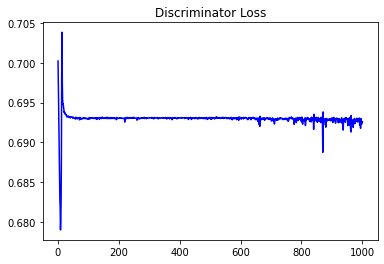

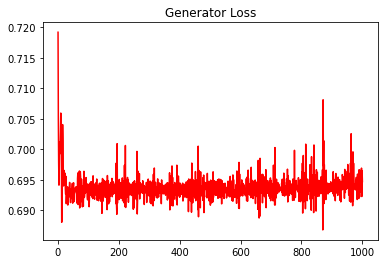

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.007882161658835199


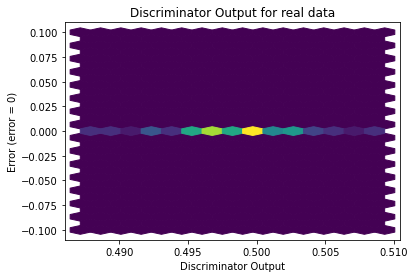

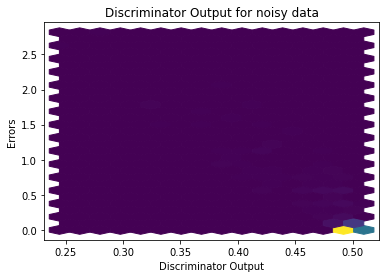

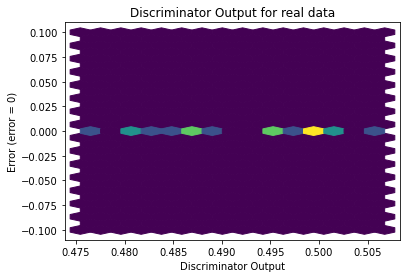

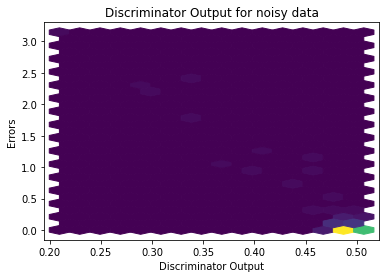

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


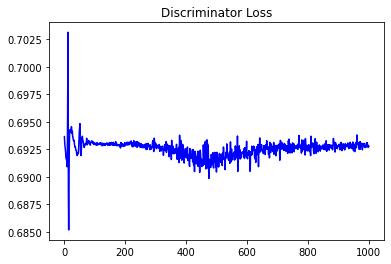

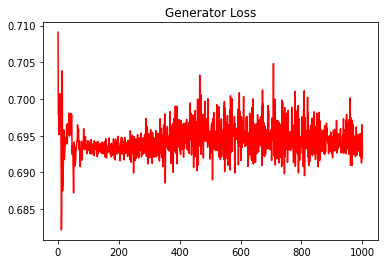

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.02010706414512207


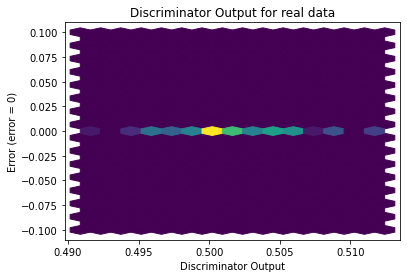

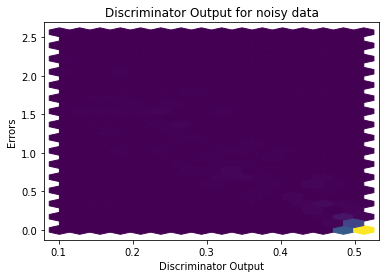

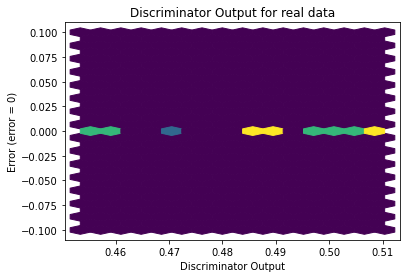

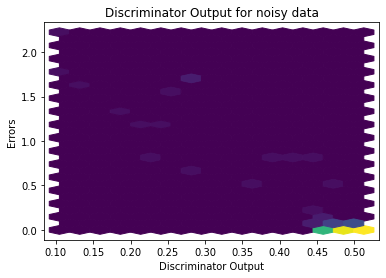

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0484]], requires_grad=True)
